In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import pandas as pd

data = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [98.90, 72.96, 42.51],
    'ViT-Basic': [97.71, 35.14, 10.21],
    'ViT-DINO': [97.51,  35.89, 7.75],
}


df = pd.DataFrame(data)

In [20]:
df

,Dataset,CNN-Basic,ViT-Basic,ViT-DINO
0,MNIST,98.90,97.71,97.51
1,CIFAR-10,72.96,35.14,35.89
2,CIFAR-100,42.51,10.21,7.75


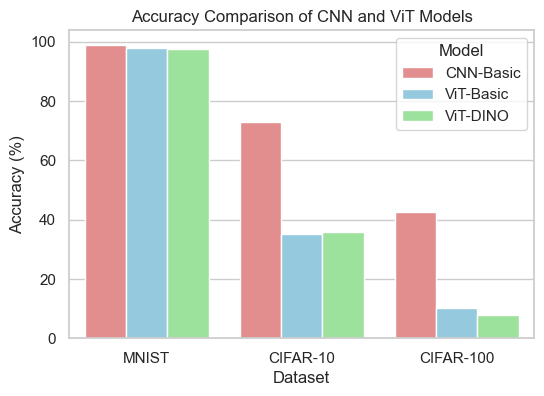

In [21]:
# Melt the DataFrame to stack ViT and CNN accuracies next to each other
df_melted = df.melt(id_vars=['Dataset'], var_name='Model', value_name='Accuracy')

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='Accuracy', hue='Model', data=df_melted, palette={"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"})

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of CNN and ViT Models')

# Add a legend
plt.legend(title='Model', loc='upper right')

# Save the plot
plt.savefig("../notebooks/plots/full_accuracy_plots.pdf", format="pdf")